Wyszukaj i pobierz zbiór danych zawierający obrazy o tematyce świątecznej. Możesz użyć gotowego
zbioru z platformy Kaggle lub stworzyć własny zestaw zdjęć.

In [73]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import os

#https://www.kaggle.com/datasets/deepcontractor/is-that-santa-image-classification/code
train_dir = 'C:/Users/megaz/PycharmProjects/Lab - TensorFlow/data/test'
validation_dir = 'C:/Users/megaz/PycharmProjects\Lab - TensorFlow/data/train'

Konfiguracja parametrów

In [74]:
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 32
EPOCHS = 10

train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalizacja pikseli do zakresu 0-1
    rotation_range=0,          # Obrót
    width_shift_range=0,      # Przesunięcie poziome
    height_shift_range=0,     # Przesunięcie pionowe
    shear_range=0.2,            # Ścinanie
    zoom_range=0.2,             # Przybliżanie
    horizontal_flip=True,       # Odbicie lustrzane
    fill_mode='nearest'
)

# Walidacja powinna być tylko przeskalowana (bez zniekształceń)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Wczytywanie danych z folderów
print("Wczytywanie zbioru treningowego:")
train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # 'binary' bo mamy tylko 2 klasy: Mikołaj vs Nie-Mikołaj
)

print("Wczytywanie zbioru walidacyjnego:")
validation_dataset = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Wczytywanie zbioru treningowego:
Found 616 images belonging to 2 classes.
Wczytywanie zbioru walidacyjnego:
Found 614 images belonging to 2 classes.


Budowa Modelu

In [75]:
model = Sequential([
    # Pierwsza warstwa konwolucyjna: wykrywa proste cechy (krawędzie, kolory)
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)), # Zmniejsza wymiarowość obrazu

    # Druga warstwa: wykrywa bardziej złożone kształty
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Trzecia warstwa (opcjonalna, dla lepszej dokładności)
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Spłaszczenie danych z 2D na 1D
    Flatten(),

    # Warstwy gęste (Dense) do klasyfikacji
    Dense(64, activation='relu'),

    # Warstwa wyjściowa: 1 neuron, sigmoid (zwraca prawdopodobieństwo od 0 do 1)
    # 0 = Klasa pierwsza, 1 = Klasa druga
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,905 (796.50 KB)

 Trainable params: 203,905 (796.50 KB)

 Non-trainable params: 0 (0.00 B)

Trenowanie Modelu

In [67]:
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=validation_dataset
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step - accuracy: 0.5227 - loss: 0.6730 - val_accuracy: 0.5733 - val_loss: 0.5909
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - accuracy: 0.8328 - loss: 0.4680 - val_accuracy: 0.8779 - val_loss: 0.4266
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 275ms/step - accuracy: 0.8539 - loss: 0.3531 - val_accuracy: 0.9023 - val_loss: 0.3387
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 274ms/step - accuracy: 0.8929 - loss: 0.2707 - val_accuracy: 0.9055 - val_loss: 0.3027
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step - accuracy: 0.9042 - loss: 0.2491 - val_accuracy: 0.8925 - val_loss: 0.4192
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 281ms/step - accuracy: 0.8945 - loss: 0.2646 - val_accuracy: 0.8779 - val_loss: 0.5036
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 286ms/step - accuracy: 0.8815 - loss: 0.2809 - val_accuracy: 0.8974 - val_loss: 0.3237
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 276ms/step - accuracy: 0.8912 - loss: 0.2655 - val_accuracy: 0.

Wizualizacja Wyników

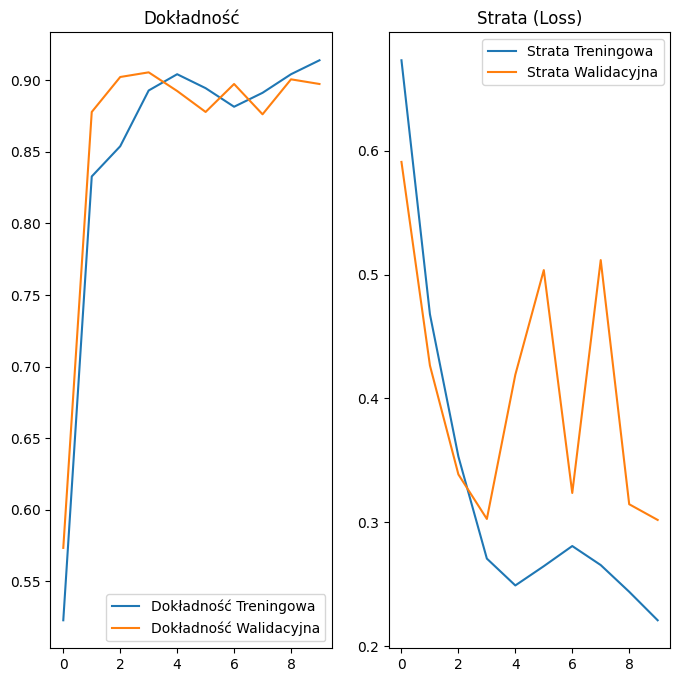

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Dokładność Treningowa')
plt.plot(epochs_range, val_acc, label='Dokładność Walidacyjna')
plt.legend(loc='lower right')
plt.title('Dokładność')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Strata Treningowa')
plt.plot(epochs_range, val_loss, label='Strata Walidacyjna')
plt.legend(loc='upper right')
plt.title('Strata (Loss)')
plt.show()